# Benefit of Multiplicative Models of Systems

Testing actuator selection and feedback of MPL models on simulations of True system
- Comparison to Nominal Model
- Comparison of MPL models

##### Py Packages

In [1]:
import numpy as np
from copy import deepcopy as dc
# %matplotlib widget

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import simulation_model_comparison, plot_simulation_comparison1, plot_simulation_comparison2, actuator_comparison, cost_comparison_print

## Code

In [2]:
test_set = 'System Model 10'
S_True = sys_from_file(test_set + ' C')
S_True['label'] = 'True System'
S_MPL = sys_from_file(test_set + ' B')
S_MPL['label'] = 'Multiplicative Model'
S_Nom = sys_from_file(test_set + ' A')
S_Nom['label'] = 'Nominal Model'

System read from file @ system_model/System Model 10 C.pickle 

System read from file @ system_model/System Model 10 B.pickle 

System read from file @ system_model/System Model 10 A.pickle 



In [3]:
ret_sim = simulation_model_comparison(S_Nom, S_MPL, S_True)
ret_sim['file_name'] = test_set

Simulation start: Comparison of actuator selection of A vs B on C
Actuator selection: Model A
Actuator selection: Model B
Actuator simulation: Model A on True System
====> Breaking current simulation at t= 26 as cumulative cost magnitude exceed 1e+08
====> Breaking current simulation at t= 28 as cumulative cost magnitude exceed 1e+08
====> Breaking current simulation at t= 102 as cumulative cost magnitude exceed 1e+08
====> Breaking current simulation at t= 120 as cumulative cost magnitude exceed 1e+08
====> Breaking current simulation at t= 121 as cumulative cost magnitude exceed 1e+08
Actuator simulation: Model B on True System
====> Breaking current simulation at t= 26 as cumulative cost magnitude exceed 1e+08
====> Breaking current simulation at t= 50 as cumulative cost magnitude exceed 1e+08
====> Breaking current simulation at t= 118 as cumulative cost magnitude exceed 1e+08
====> Breaking current simulation at t= 126 as cumulative cost magnitude exceed 1e+08
Simulation end: Comp

## Output

#### System Models

##### System C - True System

max(abs(eigvals(A)))= 0.8000
Image save @ images/System Model 10_True System.pdf


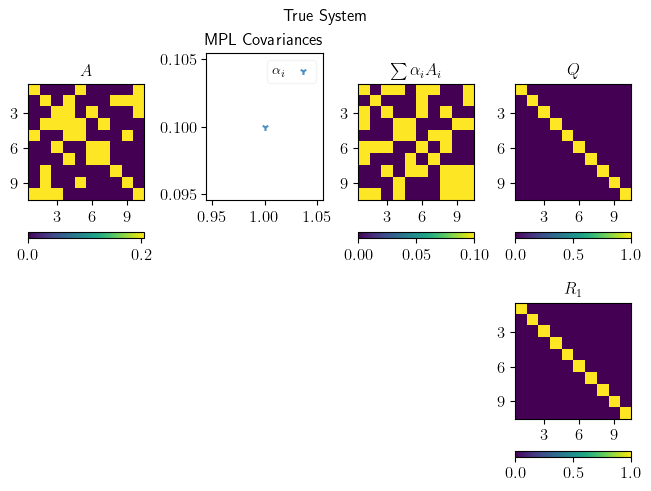

In [4]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(S_True['A'])))))
system_display_matrix(S_True, test_set)

##### System A

max(abs(eigvals(A)))= 0.8000
Image save @ images/System Model 10_Nominal Model.pdf


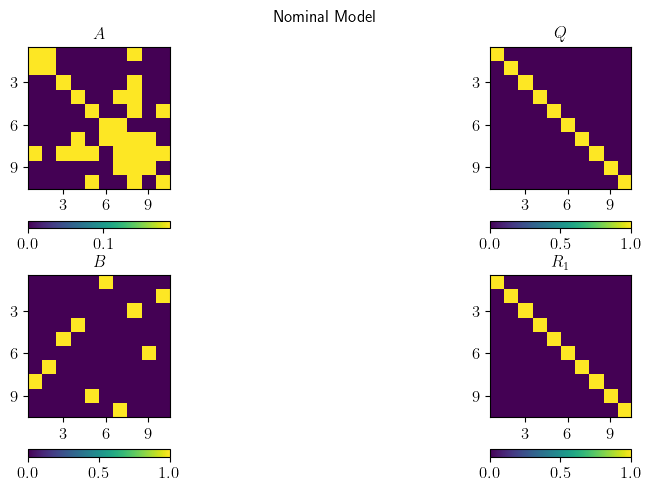

In [5]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_A']['A'])))))
system_display_matrix(ret_sim['system_A'], test_set)

##### System B

max(abs(eigvals(A)))= 0.8000
Image save @ images/System Model 10_Multiplicative Model.pdf


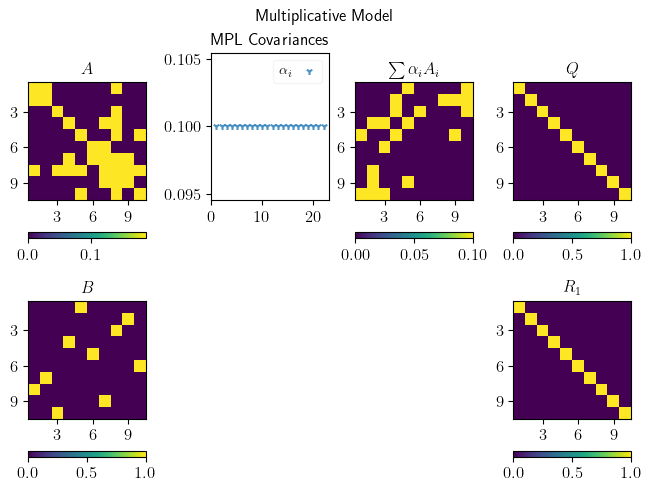

In [6]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_B']['A'])))))
system_display_matrix(ret_sim['system_B'], test_set)

#### Simulation - Trajectory, Control Input and Costs

Plot saved as images/System Model 10_comparison1.pdf


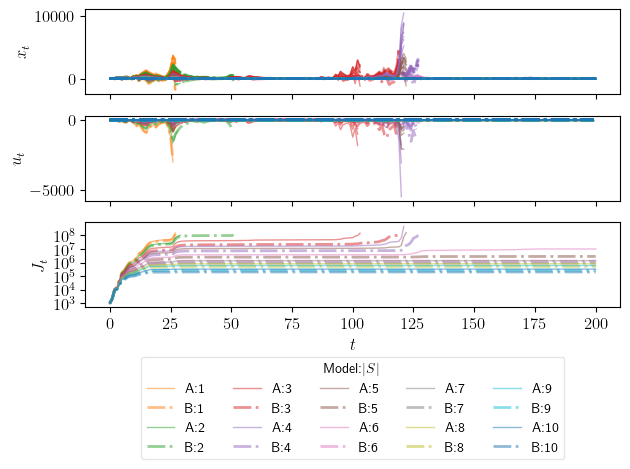

In [7]:
plot_simulation_comparison1(ret_sim)

#### Actuator set comparison

Control sets are different
Plot saved as images/System Model 10_actcomparison.pdf


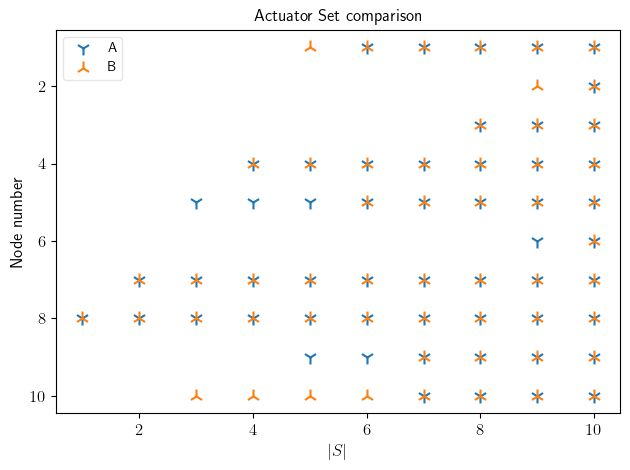

In [8]:
actuator_comparison(ret_sim, disptext=True, figplt=True);

#### Simulated costs

Plot saved as images/System Model 10_comparison2.pdf


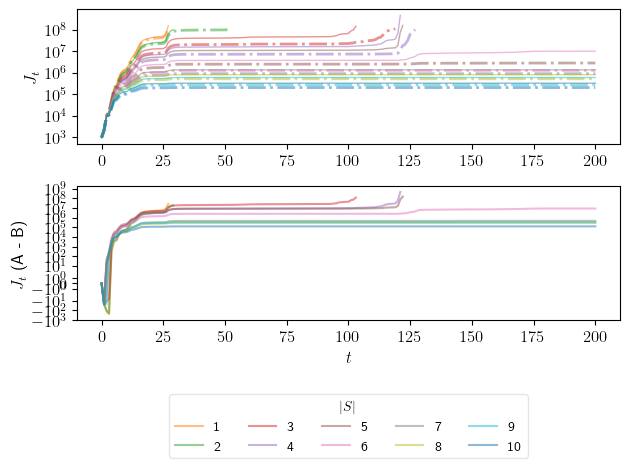

In [9]:
plot_simulation_comparison2(ret_sim)

Plot saved as images/System Model 10_costcomparison.pdf


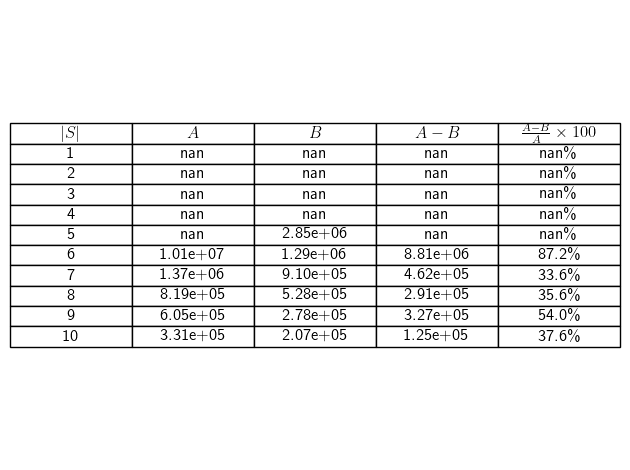

In [10]:
cost_comparison_print(ret_sim)

## Run Complete

In [11]:
print('Run Complete')

Run Complete
